In [5]:
import numpy as np
import pandas as pd
import analysis.model_assessment
import analysis.train_data_analysis
import matplotlib.pyplot as plt

In [3]:
data = np.load('../train_no_clouds.npz')
refls = data['output_rfl']
wv = data['output_wv']
fids = data['output_idx']

values, counts = np.unique(fids, return_counts=True)
scenes = np.split(refls, 743)
wv_by_scene = np.split(wv, 743)
scenes = np.array(scenes)
wv_by_scene = np.array(wv_by_scene)

print(scenes.shape)
print(wv_by_scene.shape)

bad = []
for i in range(wv_by_scene.shape[0]):
    scene = wv_by_scene[i].copy()
    if scene[np.where((scene > 5) | (scene < 0))].shape[0] != 0:
        bad.append(i)

wv_by_scene = np.delete(wv_by_scene, bad, axis = 0)
scenes = np.delete(scenes, bad, axis = 0)
print(scenes.shape)
print(wv_by_scene.shape)

(743, 1242, 285)
(743, 1242)
(649, 1242, 285)
(649, 1242)


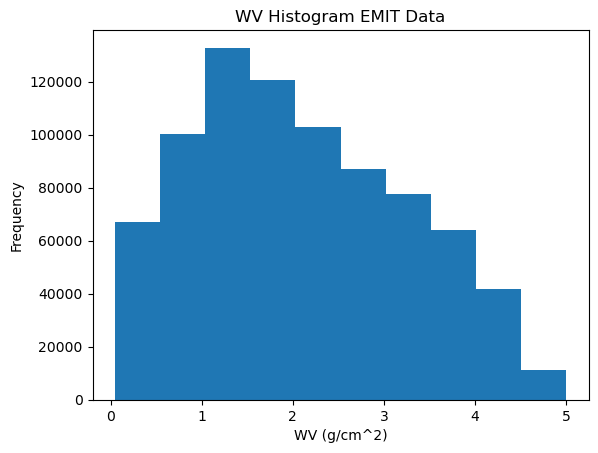

In [7]:
plt.hist(wv_by_scene.flatten())
plt.xlabel('WV (g/cm^2)')
plt.ylabel('Frequency')
plt.title('WV Histogram EMIT Data');

In [19]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(649, 100)
#X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (99360, 285)
y train:  (99360,)
X test:  (24840, 285)
y test :  (24840,)
X train index:  [387 270  80 471 288  99 191  87 205 492 592  64 295 454 647 166 475 160
 504   1 214 435 600 251 427 379  62 378 243 508 372 315 252 459 560 105
 121 343 387 418 337 455 389 474 102 339 330 461 401 476 561 156  14  58
 128 413  40 565  20 345 510 273 385 614  21 566  52 555 269 270  20 276
 138 201  71 498 189 458 391 241]
y train index:  [387 270  80 471 288  99 191  87 205 492 592  64 295 454 647 166 475 160
 504   1 214 435 600 251 427 379  62 378 243 508 372 315 252 459 560 105
 121 343 387 418 337 455 389 474 102 339 330 461 401 476 561 156  14  58
 128 413  40 565  20 345 510 273 385 614  21 566  52 555 269 270  20 276
 138 201  71 498 189 458 391 241]
X test index:  [187 216 313 130 484 646 366 343  34 564 491 161 520 308  13 106 130  91
 466 562]
y test index:  [187 216 313 130 484 646 366 343  34 564 491 161 520 308  13 106 130  91
 466 562]


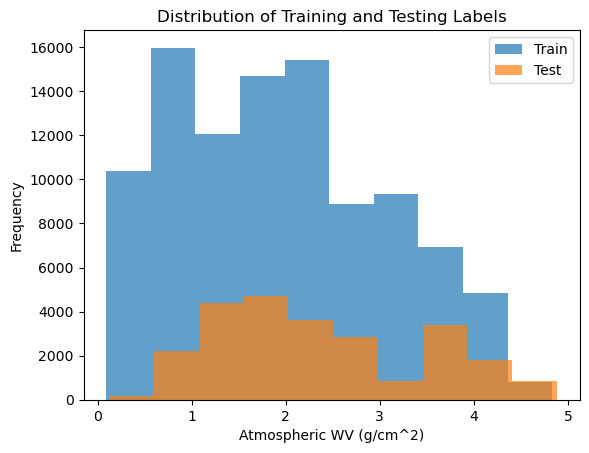

In [20]:
analysis.model_assessment.plot_hist(y_train, y_test, 'Distribution of Training and Testing Labels', 'Train', 'Test')

Text(0.5, 1.0, 'Gaussian KDE Scatter Plot for DT')

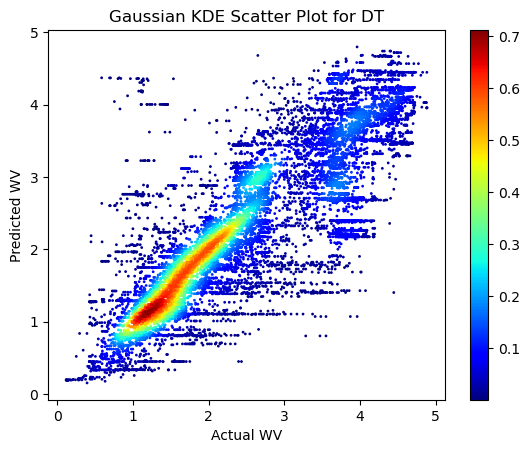

In [21]:
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import gaussian_kde

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT')

In [22]:
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_idx = np.random.choice(649, 300)
#X_idx = np.arange(649)
y_idx = X_idx
X_train_idx, X_test_idx, y_train_idx, y_test_idx = train_test_split(X_idx, y_idx, test_size = 0.2, random_state = 50)

X_train = scenes[X_train_idx, :, :]
X_train = X_train.reshape((X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_test = scenes[X_test_idx, :, :]
X_test = X_test.reshape((X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
y_train = wv_by_scene[y_train_idx, :]
y_train = y_train.flatten()
y_test = wv_by_scene[y_test_idx, :]
y_test = y_test.flatten()


print('X train: ', X_train.shape)
print('y train: ', y_train.shape)
print('X test: ', X_test.shape)
print('y test : ', y_test.shape)
print('X train index: ', X_train_idx) 
print('y train index: ', y_train_idx) 
print('X test index: ', X_test_idx) 
print('y test index: ', y_test_idx) 

X train:  (298080, 285)
y train:  (298080,)
X test:  (74520, 285)
y test :  (74520,)
X train index:  [364  85 397 373   8 189 343 510  14 112 225 315  47 106 400 472 435 608
 161 461 282 401 397 130 202 160 642 489 502 226 421 337 229 128 609 232
 194  98 639 555 646 488 325 460 546 391 270 565  98  16 402 503 129  87
 258 219 455 123 189 563 510  20 240 472 134 546 612 337   1 454 392 200
 560 624 112 556 563 619 511 472 262 400 160 403 391 402 270 645 502 372
 246 427 187  52 143 565 242  34 640 348 103   4 586 217   1 347 647  99
 122 612 358 632 251 385 162 276 276  32 419 515 471 191 230 282 550 607
 121  80 159 384 458 253 343 166  98 339  48 555 143 508 574  80 112  20
  27 627 509 207 564 252 566 303 337 384  58 134 317 345  53  64  71  52
 366 387 624 156 648 105 452  62 438  13 413 475 520 230 232  91 474 214
 224 484 186 600 205 469 480 637 273 641  95 297 243 183 573   1 441 437
 230 376 339  26 562 577 276 498 639 138 102 573 579 459 561  21 200 216
 406 330 614  32 345  3

Text(0.5, 1.0, 'Gaussian KDE Scatter Plot for DT')

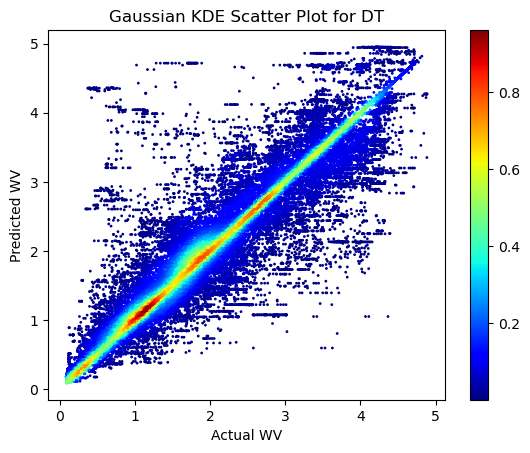

In [23]:
from sklearn.tree import DecisionTreeRegressor
from scipy.stats import gaussian_kde

dt = DecisionTreeRegressor(random_state = 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

xy_model = np.vstack([y_test, y_pred])
z_model = gaussian_kde(xy_model)(xy_model)
plt.scatter(y_test, y_pred, c=z_model, s=1, cmap="jet")
plt.colorbar()
plt.xlabel('Actual WV')
plt.ylabel('Predicted WV')
plt.title('Gaussian KDE Scatter Plot for DT')